<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/BST_Construction_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BST Construction

Write a BST class for a Binary Search Tree. The class should support:

Inserting values with the insert method.
Removing values with the remove method; this method should only remove the first instance of a given value.
Searching for values with the contains method.
Note that you can't remove values from a single-node tree. In other words, calling the remove method on a single-node tree should simply not do anything.

Each BST node has an integer value, a left child node, and a right child node. A node is said to be a valid BST node if and only if it satisfies the BST property: its value is strictly greater than the values of every node to its left; its value is less than or equal to the values of every node to its right; and its children nodes are either valid BST nodes themselves or None / null.

Sample Usage


```
// Assume the following BST has already been created:
         10
       /     \
      5      15
    /   \   /   \
   2     5 13   22
 /           \
1            14

// All operations below are performed sequentially.
insert(12):   10
            /     \
           5      15
         /   \   /   \
        2     5 13   22
      /        /  \
     1        12  14

remove(10):   12
            /     \
           5      15
         /   \   /   \
        2     5 13   22
      /           \
     1            14

contains(15): true
```



In [1]:
class BST:
	def __init__(self, value):
		self.value = value
		self.left = None
		self.right = None
	
	# avg: O(log(n)) time and O(1) space
	# worst: O(n) time and O(1) space
	def insert(self, value):
		current_node = self
		
		while True:
			if value < current_node.value:
				if current_node.left == None:
					current_node.left = BST(value)
					break
				else:
					current_node = current_node.left
			else:
				if current_node.right == None:
					current_node.right = BST(value)
					break
				else:
					current_node = current_node.right
		# return self
	
	# avg: O(log(n)) time and O(1) space
	# worst: O(n) time and O(1) space
	def contains(self, value):
		current_node = self
		
		while current_node is not None:
			if value == current_node.value:
				return True

			elif value < current_node.value:
				current_node = current_node.left

			else:
				current_node = current_node.right
		return False
	
	# avg: O(log(n)) time and O(1) space
	# worst: O(n) time and O(1) space
	def remove(self, value, parent_node = None):
		current_node = self
		while current_node is not None:
			if  value < current_node.value:
				parent_node = current_node
				current_node = current_node.left
			elif  value > current_node.value:
				parent_node = current_node
				current_node = current_node.right
			
			# found node to remove
      # complex if-else with multiple events
      # take a look on visualization below the cell
			else:
				# w/ 2 child nodes
				if current_node.left is not None and current_node.right is not None:
          # do the same for all sub cases (inc. w/o & w/ parent)
					current_node.value = current_node.right.get_min_value()
					current_node.right.remove(current_node.value, current_node)

				# w/ 1 child node
				elif current_node.left is not None or current_node.right is not None:
					# w/o parent node
					if parent_node == None:
						if current_node.left is not None:
							current_node.value = current_node.left.value
							current_node.right = current_node.left.right
							current_node.left =  current_node.left.left

						elif current_node.right is not None:
							current_node.value = current_node.right.value
							current_node.left =  current_node.right.left
							current_node.right = current_node.right.right

					# w/ parent node
					else:
						# alternate parent node
						if parent_node.left == current_node:
							parent_node.left = current_node.left if current_node.left is not None else current_node.right
						elif parent_node.right == current_node:
							parent_node.right = current_node.right if current_node.right is not None else current_node.left

				# w/o child node
				else:
					# w/o parent node
					if parent_node == None:
						# Do nothing
						pass
					# w/ parent node
					else:
						# alternate parent node
						if parent_node.left == current_node:
							parent_node.left = None
						elif parent_node.right == current_node:
							parent_node.right = None
				break
		# return self
						
	def get_min_value(self):
		current_node = self
		while current_node.left is not None:
			current_node = current_node.left
		return current_node.value

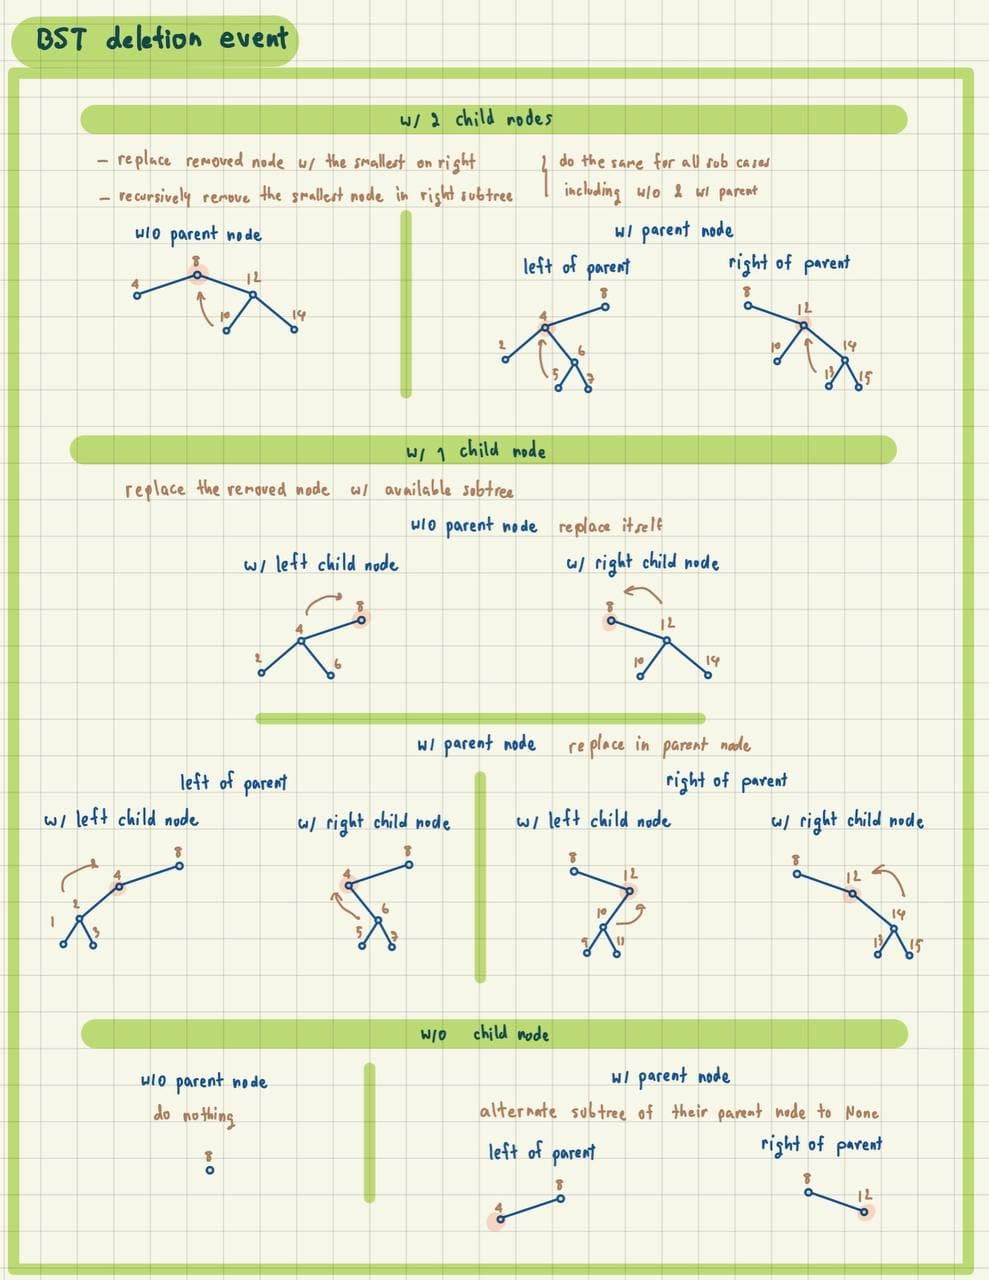

# Test

In [2]:
tree = BST(10)

In [3]:
tree.insert(5)
tree.insert(15)
tree.insert(2)
tree.insert(5)
tree.insert(13)
tree.insert(22)
tree.insert(1)
tree.insert(14)
tree.insert(12)
# tree.insert(15)

In [4]:
tree.contains(12)

True

In [5]:
tree.contains(20)

False

In [6]:
# visualize some top part of the tree
print('  ' + str(tree.value))
print(str(tree.left.value) + '   ' + str(tree.right.value))
print('   ' + str(tree.right.left.value) + '   ' + str(tree.right.right.value))

  10
5   15
   13   22


In [7]:
tree.remove(15)

In [8]:
# visualize some top part of the tree
print('  ' + str(tree.value))
print(str(tree.left.value) + '   ' + str(tree.right.value))
print('   ' + str(tree.right.left.value))

  10
5   22
   13
